In [44]:
!pip3 install seaborn==0.9.0

     |████████████████████████████████| 208 kB 1.4 MB/s eta 0:00:01
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.1
    Uninstalling seaborn-0.10.1:
      Successfully uninstalled seaborn-0.10.1
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm as tqdm

In [164]:
data = pd.read_csv("data.csv")

In [165]:
data.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


In [166]:
import numpy as np
X = data[data.columns[~data.columns.isin(['market_value'])]]
y = data['market_value']

from sklearn.model_selection import train_test_split
np.random.seed(37) # Set seed
x_train, x_test = train_test_split(X, test_size = 0.15)

## dont using iloc as we have projected from data
y_train = y.loc[x_train.index.values] 
y_test = y.loc[x_test.index.values]
x_train = X.loc[x_train.index.values, :]
x_test = X.loc[x_test.index.values, :]

In [167]:
x_train.shape

(391, 16)

In [168]:
y_train.shape

(391,)

In [169]:
concat_train_data = pd.concat([x_train,y_train],axis=1)
concat_train_data.describe()

#market price is skewed
#page_views is skewed
#fpl_points is also skewed

,age,position_cat,page_views,fpl_value,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing,market_value
count,391.000000,391.000000,391.000000,391.000000,391.000000,390.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,26.759591,2.191816,757.485934,5.446292,55.304348,2.017949,0.040921,3.191816,10.350384,0.312020,0.153453,10.968031
std,3.862841,1.010983,967.838458,1.351516,52.821343,0.949732,0.198360,1.247165,5.819727,0.463912,0.360885,12.410058
min,17.000000,1.000000,3.000000,4.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.100000
25%,24.000000,1.000000,215.500000,4.500000,2.500000,1.000000,0.000000,2.000000,5.000000,0.000000,0.000000,3.000000
50%,27.000000,2.000000,456.000000,5.000000,47.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000,7.000000
75%,29.000000,3.000000,854.500000,5.500000,92.500000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000,15.000000
max,37.000000,4.000000,7664.000000,12.000000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000,75.000000


In [170]:
import tqdm 
for i in range(0,concat_train_data.shape[0]):
    concat_train_data['fpl_sel'].iloc[i] = float(str(concat_train_data['fpl_sel'].iloc[i]).rstrip('%'))
concat_train_data['fpl_sel'] = concat_train_data['fpl_sel'].astype('float64')
concat_train_data.dtypes

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


name             object
club             object
age               int64
position         object
position_cat      int64
page_views        int64
fpl_value       float64
fpl_sel         float64
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
market_value    float64
dtype: object

In [171]:
concat_train_data.dtypes

name             object
club             object
age               int64
position         object
position_cat      int64
page_views        int64
fpl_value       float64
fpl_sel         float64
fpl_points        int64
region          float64
nationality      object
new_foreign       int64
age_cat           int64
club_id           int64
big_club          int64
new_signing       int64
market_value    float64
dtype: object

In [172]:
concat_train_data.corr()['market_value'].sort_values()

position_cat   -0.214283
age            -0.124306
age_cat        -0.108604
club_id        -0.065705
region          0.097836
new_foreign     0.106257
new_signing     0.138217
fpl_sel         0.538662
fpl_points      0.597930
big_club        0.611723
page_views      0.742173
fpl_value       0.780221
market_value    1.000000
Name: market_value, dtype: float64

In [173]:
concat_train_data.describe()

,age,position_cat,page_views,fpl_value,fpl_sel,fpl_points,region,new_foreign,age_cat,club_id,big_club,new_signing,market_value
count,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000,390.000000,391.000000,391.000000,391.000000,391.000000,391.000000,391.000000
mean,26.759591,2.191816,757.485934,5.446292,3.127877,55.304348,2.017949,0.040921,3.191816,10.350384,0.312020,0.153453,10.968031
std,3.862841,1.010983,967.838458,1.351516,5.541810,52.821343,0.949732,0.198360,1.247165,5.819727,0.463912,0.360885,12.410058
min,17.000000,1.000000,3.000000,4.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.100000
25%,24.000000,1.000000,215.500000,4.500000,0.200000,2.500000,1.000000,0.000000,2.000000,5.000000,0.000000,0.000000,3.000000
50%,27.000000,2.000000,456.000000,5.000000,0.900000,47.000000,2.000000,0.000000,3.000000,10.000000,0.000000,0.000000,7.000000
75%,29.000000,3.000000,854.500000,5.500000,3.200000,92.500000,2.000000,0.000000,4.000000,15.000000,1.000000,0.000000,15.000000
max,37.000000,4.000000,7664.000000,12.000000,45.000000,264.000000,4.000000,1.000000,6.000000,20.000000,1.000000,1.000000,75.000000


In [174]:
concat_train_data['fpl_sel'].skew()

3.396597057458165

In [175]:
a = np.sqrt(concat_train_data['market_value'])
a.skew()


0.9463062524592569

In [176]:
a = np.sqrt(concat_train_data['page_views'])
a.skew()

1.530456371038671

In [177]:
concat_train_data['page_views'].skew()

3.3045357948695178

In [178]:
concat_train_data['fpl_points'].skew()

0.9052123169193358

In [179]:
data.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


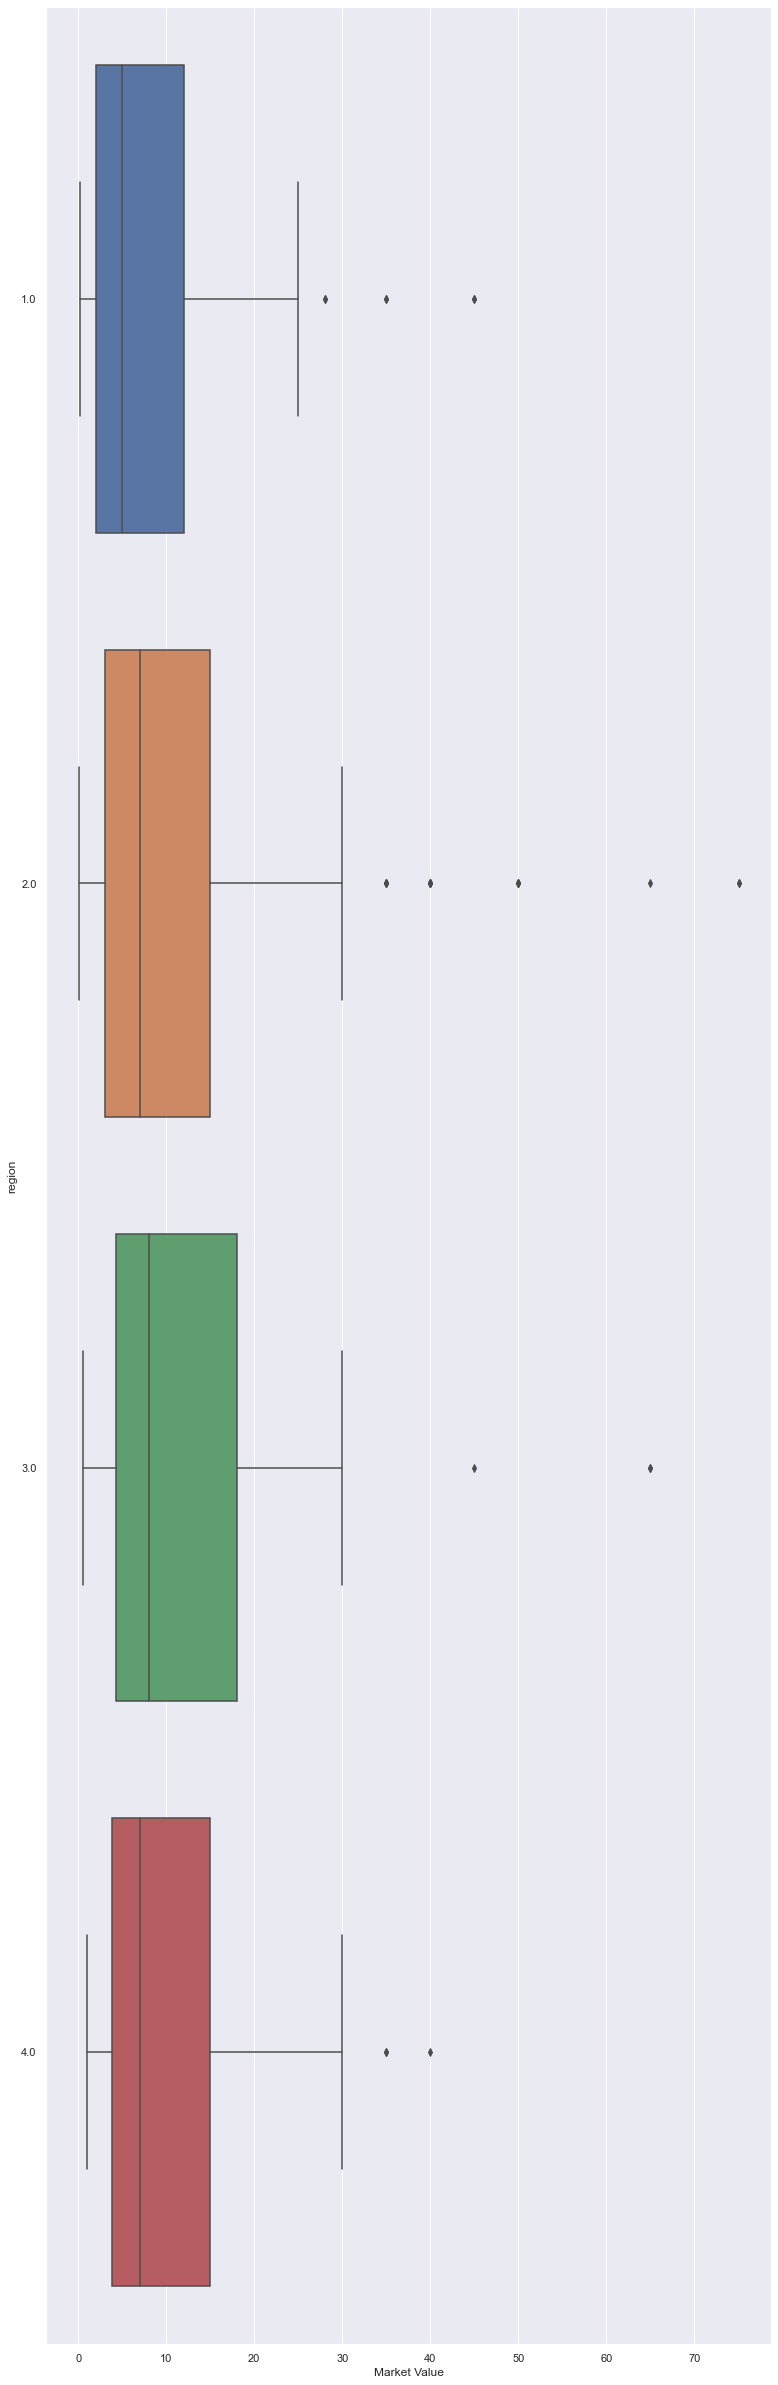

In [180]:
output_var = 'market_value'
import seaborn as sns
sns.boxplot(y='region',x=output_var,data=concat_train_data,orient='h')
plt.xlabel("Market Value")
plt.show()

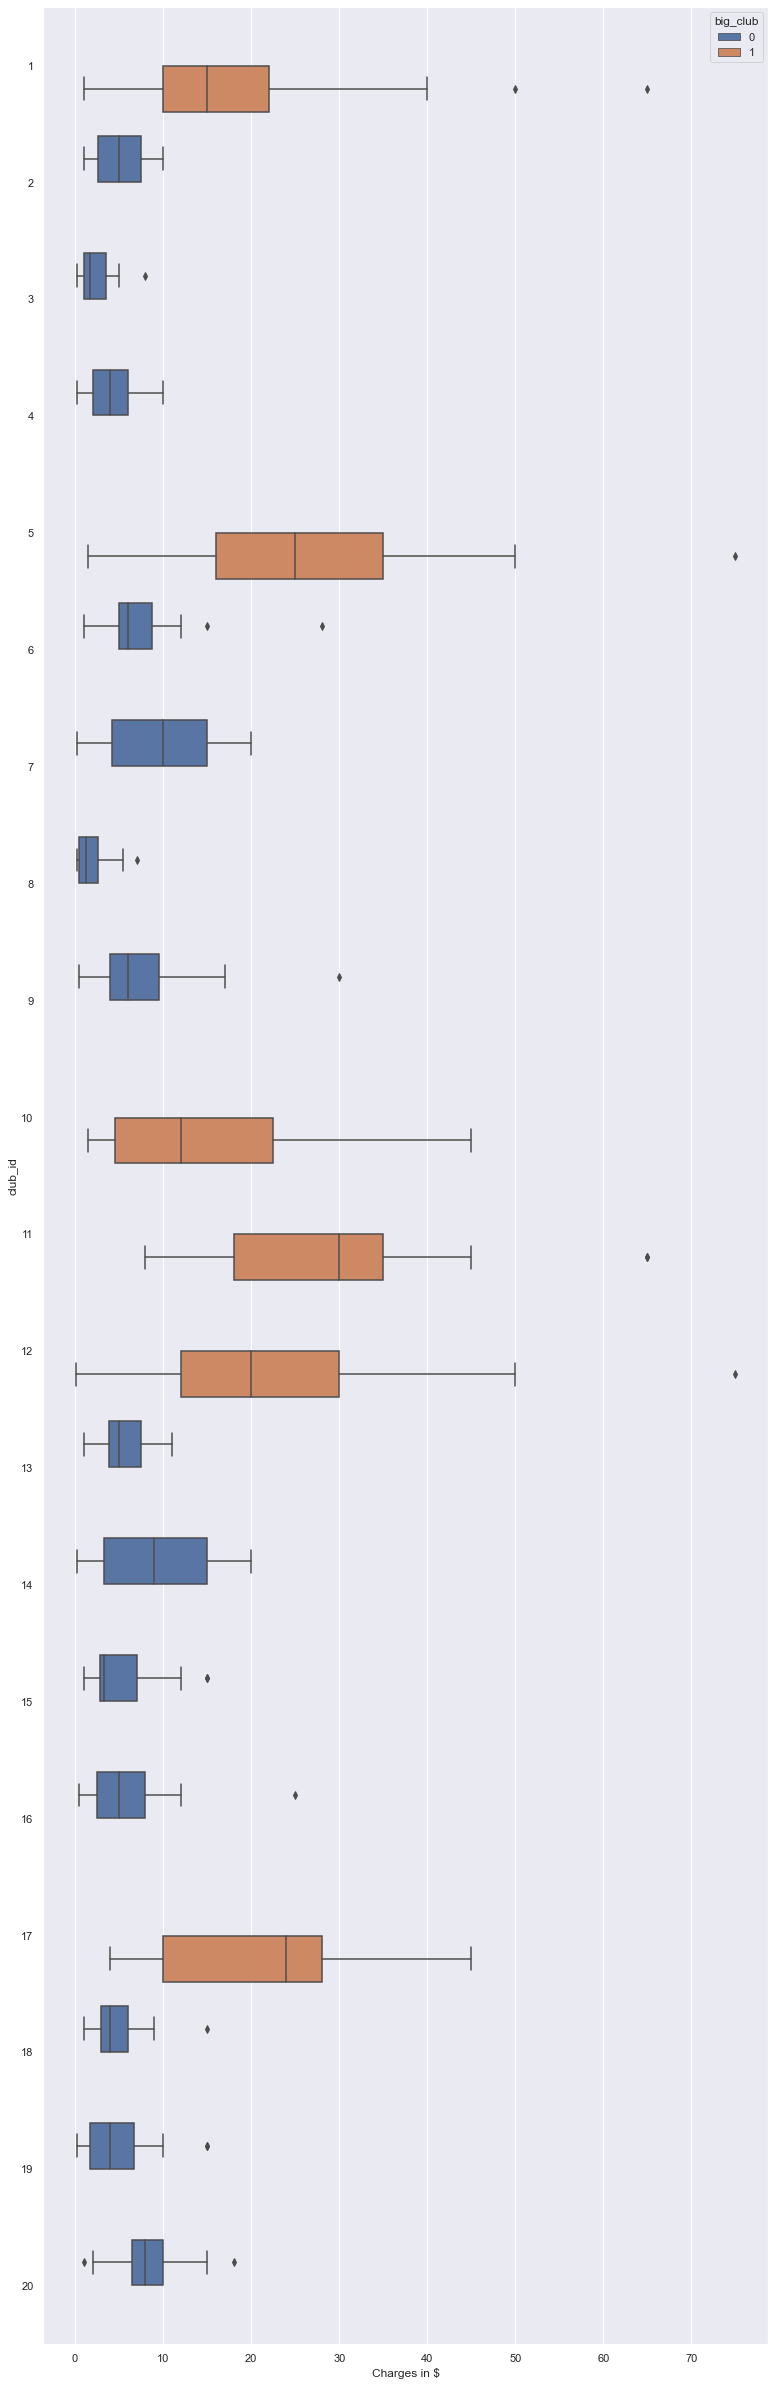

In [181]:
#sns.set(rc={'figure.figsize':(13,43)})
sns.boxplot(y='club_id',x='market_value',data=concat_train_data,hue='big_club',orient='h')
plt.xlabel("Charges in $")
plt.show()

In [182]:
sns.displot(concat_train_data, x=output_var, hue="region", kind="kde", fill=True)

AttributeError: module 'seaborn' has no attribute 'displot'

In [183]:
encoded_data = pd.get_dummies(concat_train_data, columns=["position"],drop_first=True)

In [184]:
encoded_data.columns

Index(['name', 'club', 'age', 'position_cat', 'page_views', 'fpl_value',
       'fpl_sel', 'fpl_points', 'region', 'nationality', 'new_foreign',
       'age_cat', 'club_id', 'big_club', 'new_signing', 'market_value',
       'position_CB', 'position_CF', 'position_CM', 'position_DM',
       'position_GK', 'position_LB', 'position_LM', 'position_LW',
       'position_RB', 'position_RM', 'position_RW', 'position_SS'],
      dtype='object')

In [185]:
encoded_data.corr()['market_value']

age            -0.124306
position_cat   -0.214283
page_views      0.742173
fpl_value       0.780221
fpl_sel         0.538662
fpl_points      0.597930
region          0.097836
new_foreign     0.106257
age_cat        -0.108604
club_id        -0.065705
big_club        0.611723
new_signing     0.138217
market_value    1.000000
position_CB    -0.081030
position_CF     0.077275
position_CM     0.017418
position_DM     0.025535
position_GK    -0.093826
position_LB    -0.051942
position_LM    -0.070184
position_LW     0.080405
position_RB    -0.097978
position_RM    -0.003380
position_RW    -0.001943
position_SS    -0.040806
Name: market_value, dtype: float64

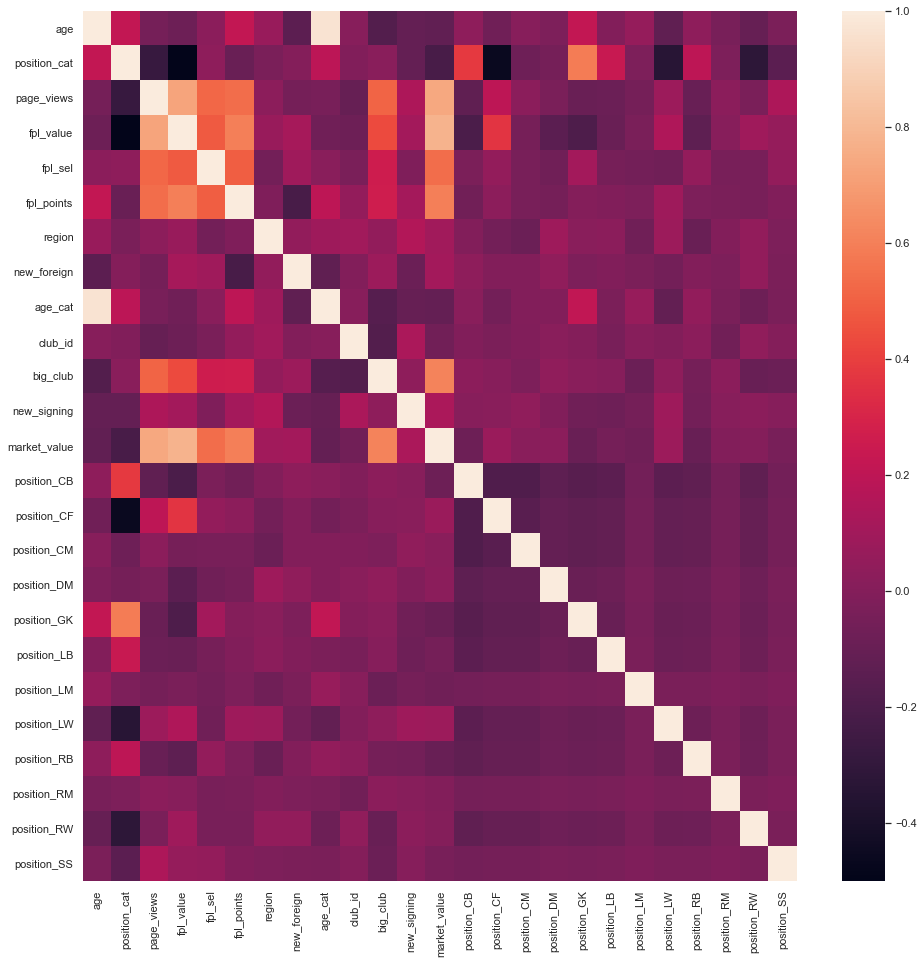

In [186]:
plt.figure(figsize=(16,16))
sns.heatmap(encoded_data.corr())

In [187]:
#not included

#position
#nationality
#age
#name
#club


In [188]:
concat_train_data.corr()['market_value'].sort_values()

position_cat   -0.214283
age            -0.124306
age_cat        -0.108604
club_id        -0.065705
region          0.097836
new_foreign     0.106257
new_signing     0.138217
fpl_sel         0.538662
fpl_points      0.597930
big_club        0.611723
page_views      0.742173
fpl_value       0.780221
market_value    1.000000
Name: market_value, dtype: float64

In [189]:
concat_train_data = concat_train_data.dropna()

In [190]:
X_temp = concat_train_data.drop(['position','name','age','club','nationality'], axis = 1)
X_temp.head

<bound method NDFrame.head of      position_cat  page_views  fpl_value  fpl_sel  fpl_points  region  \
4               3         912        6.0      0.7         121     2.0   
283             4         395        4.0      1.0           6     2.0   
52              4         103        4.0      2.1           0     2.0   
325             1         126        4.5      0.1          12     1.0   
209             2         325        4.5      0.1           6     2.0   
..            ...         ...        ...      ...         ...     ...   
437             4         100        4.0      5.3           0     2.0   
251             1        4254       10.5     15.2          67     3.0   
332             3         134        5.0      1.3         103     2.0   
363             1         437        5.0      0.1          34     4.0   
399             3         345        5.0      0.6          87     2.0   

     new_foreign  age_cat  club_id  big_club  new_signing  market_value  
4              0   

In [191]:
# from sklearn import datasets, linear_model
# from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

X = X_temp.drop(['market_value'], axis = 1).to_numpy()
y = X_temp['market_value'].to_numpy()

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     115.8
Date:                Thu, 05 Nov 2020   Prob (F-statistic):          9.99e-114
Time:                        15:36:03   Log-Likelihood:                -1247.9
No. Observations:                 390   AIC:                             2520.
Df Residuals:                     378   BIC:                             2567.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -16.9566      2.931     -5.785      0.0

In [192]:
from sklearn.metrics import mean_squared_error

In [193]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
reg.score(X, y)    

0.7711618740747869

In [194]:
for i in range(0,x_test.shape[0]):
    x_test['fpl_sel'].iloc[i] = float(str(x_test['fpl_sel'].iloc[i]).rstrip('%'))
x_test['fpl_sel'] = x_test['fpl_sel'].astype('float64')
x_test.dtypes
x_test.head

pred = reg.predict(x_test)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


ValueError: could not convert string to float: 'Xherdan Shaqiri'

In [149]:
pred

array([11.50428615,  7.06414935,  2.58308386,  8.29827856, 17.32716015,
        4.21722698,  2.85083806,  0.68570359, 11.1561242 ,  4.43376931,
       27.94771084,  7.01064353, -0.6569301 ,  3.8091504 , 25.44222327,
       10.69105919,  1.94956688, -0.5791774 ,  7.91932323,  8.08370683,
       24.4479978 , 10.73969637, 17.98740478,  3.76462605,  8.21034996,
        0.89744558, 14.34776981,  9.94227197,  8.14163142,  2.73622433,
        7.31899   , 38.44101123,  2.89241718, 26.35591725,  4.69218732,
        2.06612582, 20.26659514, 19.76827025, 13.89736469, 15.0952881 ,
        5.52722981,  6.22462976, -0.68671477, 62.02072769, 20.89442758,
       18.0025429 , 18.30245411,  1.2819781 , 12.02369026,  7.87454704,
       25.19702298, 11.50943826, 11.98632965,  2.52066679,  9.23399701,
       15.39008895, 16.30325608,  6.1992137 , -3.37948616,  3.46057609,
        0.5329969 ,  2.99232382, 19.55338152, 13.45692617, 18.34720706,
        7.93315252,  1.84096155,  3.39188123,  5.3719213 , 29.84

In [152]:
mean_squared_error(y_test,pred) #without feature engg

29.12091475726105

In [162]:
pred = reg.predict(X)
mean_squared_error(y,pred)

ValueError: could not convert string to float: 'Alexis Sanchez'